Basics of Blockchain

    Blockchain Structure: A blockchain is a chain of blocks. Each block contains:
        A list of transactions.
        A timestamp.
        A hash of the previous block.
        Its own hash.

    Hashing: Hashing is a process that takes an input (or 'message') and returns a fixed-length string of bytes. A small change in input drastically changes the output hash.

    Proof of Work (PoW): A consensus mechanism to ensure the security of the blockchain. Miners compete to solve a mathematical problem, and the first to solve it gets to add the next block to the blockchain.

    Decentralization: Instead of having a central authority, blockchain relies on a distributed network of nodes that all maintain a copy of the blockchain.

In [1]:
! pip install hashlib

ERROR: Ignored the following yanked versions: 20081119
ERROR: Could not find a version that satisfies the requirement hashlib (from versions: none)
ERROR: No matching distribution found for hashlib


In [1]:
import hashlib

In [2]:
# Block class

import hashlib
import time

class Block:
    def __init__(self, index, previous_hash, timestamp, data, nonce=0):
        self.index = index
        self.previous_hash = previous_hash
        self.timestamp = timestamp
        self.data = data
        self.nonce = nonce
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        value = (str(self.index) + str(self.previous_hash) + 
                 str(self.timestamp) + str(self.data) + str(self.nonce))
        return hashlib.sha256(value.encode('utf-8')).hexdigest()

    def __str__(self):
        return (f"Block(Index: {self.index}, "
                f"Previous Hash: {self.previous_hash}, "
                f"Timestamp: {self.timestamp}, "
                f"Data: {self.data}, "
                f"Nonce: {self.nonce}, "
                f"Hash: {self.hash})")


In [3]:
# Blockchain class

class Blockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]

    def create_genesis_block(self):
        return Block(0, "0", time.time(), "Genesis Block")

    def get_latest_block(self):
        return self.chain[-1]

    def add_block(self, new_block):
        new_block.previous_hash = self.get_latest_block().hash
        new_block.hash = new_block.calculate_hash()
        self.chain.append(new_block)

    def __str__(self):
        chain_str = ""
        for block in self.chain:
            chain_str += str(block) + "\n"
        return chain_str


In [4]:
# proof of work

class Block:
    def __init__(self, index, previous_hash, timestamp, data, nonce=0):
        self.index = index
        self.previous_hash = previous_hash
        self.timestamp = timestamp
        self.data = data
        self.nonce = nonce
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        value = (str(self.index) + str(self.previous_hash) + 
                 str(self.timestamp) + str(self.data) + str(self.nonce))
        return hashlib.sha256(value.encode('utf-8')).hexdigest()

    def mine_block(self, difficulty):
        target = '0' * difficulty
        while self.hash[:difficulty] != target:
            self.nonce += 1
            self.hash = self.calculate_hash()
        print(f"Block mined: {self.hash}")

class Blockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]
        self.difficulty = 4  # Difficulty level for PoW

    def create_genesis_block(self):
        return Block(0, "0", time.time(), "Genesis Block")

    def get_latest_block(self):
        return self.chain[-1]

    def add_block(self, new_block):
        new_block.previous_hash = self.get_latest_block().hash
        new_block.mine_block(self.difficulty)
        self.chain.append(new_block)

    def __str__(self):
        chain_str = ""
        for block in self.chain:
            chain_str += str(block) + "\n"
        return chain_str


In [5]:
# Testing blockchain

# Create the blockchain
my_blockchain = Blockchain()

# Add blocks
my_blockchain.add_block(Block(1, my_blockchain.get_latest_block().hash, time.time(), "Block 1 Data"))
my_blockchain.add_block(Block(2, my_blockchain.get_latest_block().hash, time.time(), "Block 2 Data"))
my_blockchain.add_block(Block(3, my_blockchain.get_latest_block().hash, time.time(), "Block 3 Data"))
my_blockchain.add_block(Block(4, my_blockchain.get_latest_block().hash, time.time(), "Block 4 Data"))


# Print the blockchain
print(my_blockchain)


Block mined: 00000232141a37035c41233b4985ab6c8998185b2ea51d0f90bab96d088f6ccd
Block mined: 0000199ac3a9402a4c5056952d1d853e5fdc7c17ee8d81074d1ed72816839eb4
Block mined: 0000dec55333efa6606370d755e394ac2eef7f8fcb2dabcc4a491217cfa82ebc
Block mined: 0000324729760143f634e09640d1c120613dc13711a9775973ae6e28ec12ca1d



Block mined: 000075dca7cb0f6e690d4d5460c504a6a17aa68f810c873674abf11381c8cc67
Block mined: 0000095a344058f2a4421ffdc697e79f9585db03c3ee542217c085eb6a35e1c3
Block mined: 0000fbf2e8701c01ef6e32e0a36568c7a8f4c94f29c740566192866adcdcceff
Block mined: 0000ccfd68f4b38cc625416d35474b7958640a5ca0d1c8a6ac1c100332142cd7
Block mined: 0000b76eb33ac312f523fde0d5c3da35b2d22e07d2eeecf01541f98926d16f22
Block(Index: 0, Previous Hash: 0, Timestamp: 1719309864.8483126, Data: Genesis Block, Nonce: 0, Hash: f1ae5b345be1a4e2f9a857b42ca3f085c9194444f257c6ad9238927203156838)
Block(Index: 1, Previous Hash: f1ae5b345be1a4e2f9a857b42ca3f085c9194444f257c6ad9238927203156838, Timestamp: 1719309864.8484242, Data: Block 1 Data, Nonce: 91100, Hash: 000075dca7cb0f6e690d4d5460c504a6a17aa68f810c873674abf11381c8cc67)
Block(Index: 2, Previous Hash: 000075dca7cb0f6e690d4d5460c504a6a17aa68f810c873674abf11381c8cc67, Timestamp: 1719309865.0601072, Data: Block 2 Data, Nonce: 141856, Hash: 0000095a344058f2a4421ffdc697e79f9585db0

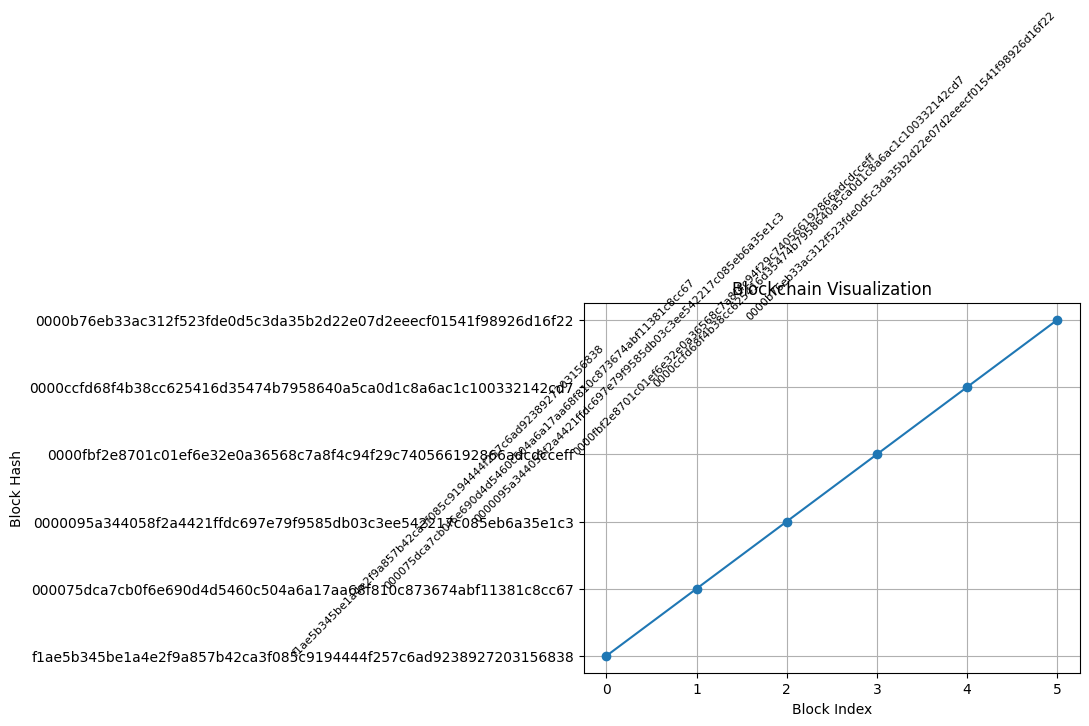

In [8]:
# Add blocks and add visualize

import hashlib
import time
import matplotlib.pyplot as plt

class Block:
    def __init__(self, index, previous_hash, timestamp, data, nonce=0):
        self.index = index
        self.previous_hash = previous_hash
        self.timestamp = timestamp
        self.data = data
        self.nonce = nonce
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        value = (str(self.index) + str(self.previous_hash) + 
                 str(self.timestamp) + str(self.data) + str(self.nonce))
        return hashlib.sha256(value.encode('utf-8')).hexdigest()

    def mine_block(self, difficulty):
        target = '0' * difficulty
        while self.hash[:difficulty] != target:
            self.nonce += 1
            self.hash = self.calculate_hash()
        print(f"Block mined: {self.hash}")

    def __str__(self):
        return (f"Block(Index: {self.index}, "
                f"Previous Hash: {self.previous_hash}, "
                f"Timestamp: {self.timestamp}, "
                f"Data: {self.data}, "
                f"Nonce: {self.nonce}, "
                f"Hash: {self.hash})")

class Blockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]
        self.difficulty = 4

    def create_genesis_block(self):
        return Block(0, "0", time.time(), "Genesis Block")

    def get_latest_block(self):
        return self.chain[-1]

    def add_block(self, new_block):
        new_block.previous_hash = self.get_latest_block().hash
        new_block.mine_block(self.difficulty)
        self.chain.append(new_block)

    def __str__(self):
        chain_str = ""
        for block in self.chain:
            chain_str += str(block) + "\n"
        return chain_str

    def visualize_blockchain(self):
        block_indexes = [block.index for block in self.chain]
        block_hashes = [block.hash for block in self.chain]

        fig, ax = plt.subplots()
        ax.plot(block_indexes, block_hashes, marker='o')

        for i, txt in enumerate(block_hashes):
            ax.annotate(txt, (block_indexes[i], block_hashes[i]), fontsize=8, rotation=45, ha='right')

        plt.xlabel('Block Index')
        plt.ylabel('Block Hash')
        plt.title('Blockchain Visualization')
        plt.grid(True)
        plt.show()

# Create the blockchain
my_blockchain = Blockchain()

# Add blocks with sample data
for i in range(1, 6):
    my_blockchain.add_block(Block(i, my_blockchain.get_latest_block().hash, time.time(), f"Block {i} Data"))

# Print the blockchain
print(my_blockchain)

# Visualize the blockchain
my_blockchain.visualize_blockchain()


In [10]:
# testing the fabricated hash

import hashlib
import time
import matplotlib.pyplot as plt

class Block:
    def __init__(self, index, previous_hash, timestamp, data, nonce=0):
        self.index = index
        self.previous_hash = previous_hash
        self.timestamp = timestamp
        self.data = data
        self.nonce = nonce
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        value = (str(self.index) + str(self.previous_hash) + 
                 str(self.timestamp) + str(self.data) + str(self.nonce))
        return hashlib.sha256(value.encode('utf-8')).hexdigest()

    def mine_block(self, difficulty):
        target = '0' * difficulty
        while self.hash[:difficulty] != target:
            self.nonce += 1
            self.hash = self.calculate_hash()
        print(f"Block mined: {self.hash}")

    def __str__(self):
        return (f"Block(Index: {self.index}, "
                f"Previous Hash: {self.previous_hash}, "
                f"Timestamp: {self.timestamp}, "
                f"Data: {self.data}, "
                f"Nonce: {self.nonce}, "
                f"Hash: {self.hash})")

class Blockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]
        self.difficulty = 4

    def create_genesis_block(self):
        return Block(0, "0", time.time(), "Genesis Block")

    def get_latest_block(self):
        return self.chain[-1]

    def add_block(self, new_block):
        new_block.previous_hash = self.get_latest_block().hash
        new_block.mine_block(self.difficulty)
        self.chain.append(new_block)

    def is_chain_valid(self):
        for i in range(1, len(self.chain)):
            current_block = self.chain[i]
            previous_block = self.chain[i - 1]
            if current_block.hash != current_block.calculate_hash():
                print(f"Block {current_block.index} has invalid hash.")
                return False
            if current_block.previous_hash != previous_block.hash:
                print(f"Block {current_block.index} has invalid previous hash.")
                return False
        return True

    def fabricate_hash(self, block_index, fake_hash):
        if block_index < len(self.chain):
            self.chain[block_index].hash = fake_hash

    def __str__(self):
        chain_str = ""
        for block in self.chain:
            chain_str += str(block) + "\n"
        return chain_str

    def visualize_blockchain(self):
        block_indexes = [block.index for block in self.chain]
        block_hashes = [block.hash for block in self.chain]

        fig, ax = plt.subplots()
        ax.plot(block_indexes, block_hashes, marker='o')

        for i, txt in enumerate(block_hashes):
            ax.annotate(txt, (block_indexes[i], block_hashes[i]), fontsize=8, rotation=45, ha='right')

        plt.xlabel('Block Index')
        plt.ylabel('Block Hash')
        plt.title('Blockchain Visualization')
        plt.grid(True)
        plt.show()

# Create the blockchain
my_blockchain = Blockchain()

# Add blocks with sample data
for i in range(1, 6):
    my_blockchain.add_block(Block(i, my_blockchain.get_latest_block().hash, time.time(), f"Block {i} Data"))

# Print the blockchain
print("Blockchain before fabrication:")
print(my_blockchain)

# Fabricate a hash for block 3
fake_hash = "0000000000000000000000000000000000000000000000000000000000000000"
my_blockchain.fabricate_hash(3, fake_hash)

# Print the blockchain after fabrication
print("\nBlockchain after fabrication:")
print(my_blockchain)

# Check if the blockchain is valid
print("\nIs blockchain valid?", my_blockchain.is_chain_valid())

# Visualize the blockchain
# my_blockchain.visualize_blockchain()


Block mined: 0000d640191c17ba977db031b14b5c3b6ae789f4bfc284caca2350a5322170c4
Block mined: 00001794f432cce4f6578f32dc3fab5dc5cdd601cdd6cb86f6e066138e9fbd07
Block mined: 00002f7b143d50feb485dfed2653dab538ef8f8dcafc42b7a80ce0a589ed6ad6
Block mined: 00005e477798a91359bd9d229bedc87e2b8ce07ffc78dd31b31a359fed81d328
Block mined: 00004cdf23084beed938e73956b6a8c350c407ca13439ce6b0d77a39e5b26397
Blockchain before fabrication:
Block(Index: 0, Previous Hash: 0, Timestamp: 1719309924.2737725, Data: Genesis Block, Nonce: 0, Hash: 5b68eba4dca691f8dc221798cf703967f61fc9e2515a800232d0b1a17ff162d7)
Block(Index: 1, Previous Hash: 5b68eba4dca691f8dc221798cf703967f61fc9e2515a800232d0b1a17ff162d7, Timestamp: 1719309924.273953, Data: Block 1 Data, Nonce: 4957, Hash: 0000d640191c17ba977db031b14b5c3b6ae789f4bfc284caca2350a5322170c4)
Block(Index: 2, Previous Hash: 0000d640191c17ba977db031b14b5c3b6ae789f4bfc284caca2350a5322170c4, Timestamp: 1719309924.2957563, Data: Block 2 Data, Nonce: 110868, Hash: 00001794f4